In [19]:
%matplotlib inline

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
from scipy import stats
from matplotlib.mlab import normpdf


sns.set()
c_0 = sns.color_palette()[0]
c_1 = sns.color_palette()[1]
c_2 = sns.color_palette()[2]

sns.set_style("dark")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

plt.rcParams['figure.figsize'] = (12,8)
%config InlineBackend.figure_format='retina'

# Descriptive Statistics
**Final project**
John Hagler
2016-08-06

## Questions for Investigation
This experiment will require the use of a standard deck of playing cards. This is a deck of fifty-two cards divided into four suits (spades (♠), hearts (♥), diamonds (♦), and clubs (♣)), each suit containing thirteen cards (Ace, numbers 2-10, and face cards Jack, Queen, and King). You can use either a physical deck of cards for this experiment or you may use a virtual deck of cards such as that found on random.org (http://www.random.org/playing-cards/).
For the purposes of this task, assign each card a value: The Ace takes a value of 1, numbered cards take the value printed on the card, and the Jack, Queen, and King each take a value of 10.

## 1. Plot relative frequency distribution
First, create a histogram depicting the relative frequencies of the card values.

*Rubric: A histogram is provided that accurately reflects the card values’ relative frequency distribution.*

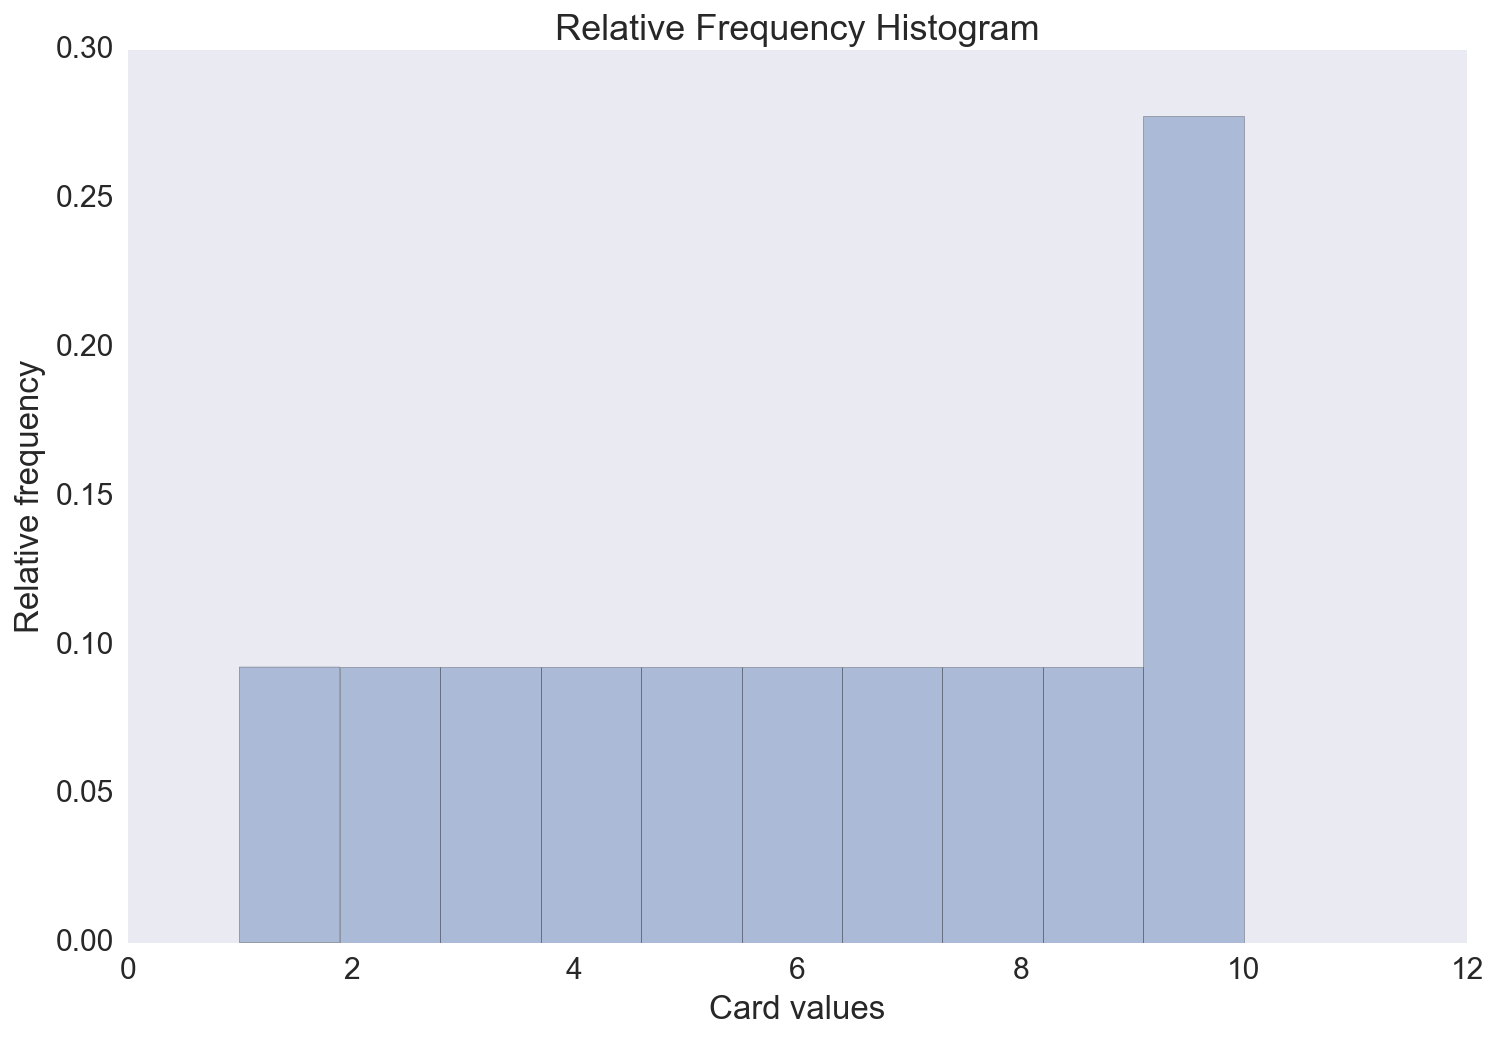

In [33]:
def get_deck():
    return (range(1, 10) + [10] * 3) * 4

df_cards = pd.DataFrame({'Card Values': get_deck()})

plt.figure(0)
sns.distplot(df_cards, norm_hist=True, bins=10, kde=False)
plt.title('Relative Frequency Histogram')
plt.xlabel('Card values')
plt.ylabel('Relative frequency')
plt.show()



For cards values one through nine, the relative frequency is $\frac{4}{52}=0.077$.  For example there are four possible cards that have a value of six (♥6, ♣6, ♦6, ♠6) out of 52 total possible cards.  For cards valued at ten, there are 16 possibilities (four 10’s, four Jacks, four Queens, and four Kings).  This relative frequency is $\frac{16}{52}=.25$.  The total relative frequencies for all card values sums to 1.

$$9\Big(\frac{4}{52}\Big)+(\frac{16}{52}\Big)=1$$
$$\Big(\frac{36}{52}\Big)+\Big(\frac{16}{52}\Big)=1$$
$$\Big(\frac{52}{52}\Big)=1$$


## 2. Get samples
Now, we will get samples for a new distribution. To obtain a single sample, shuffle your deck of cards and draw three cards from it. (You will be sampling from the deck without replacement.) Record the cards that you have drawn and the sum of the three cards’ values. Repeat this sampling procedure a total of at least thirty times.

*Rubric: At least thirty samples have been performed and the summed values from each sample have been reported in a submitted spreadsheet.*

In [40]:
# use a static list of random number as seeds
seeds = []
with open('seeds.txt', 'r') as f:
    seeds = f.readlines()
    seeds = map(lambda x: int(x), seeds)

def get_cards():
    cards = get_deck()

    seed = seeds.pop()
    random.seed(seed)
    random.shuffle(cards)

    return cards


In [41]:
hands = []
cards = []

for i in range(3000):

    if len(cards) < 3:
        cards = get_cards()

    hand = []
    for j in range(3):
        hand.append(cards.pop(0))
    hands.append(hand)


sums = map(lambda x: sum(x), hands)

df = pd.DataFrame(hands, columns=['Card 1', 'Card 2', 'Card 3'])
df['sums'] = sums

In [38]:
df.to_csv('results.csv')

In [42]:
df.head()

,Card 1,Card 2,Card 3,sums
0,10,3,2,15
1,10,8,3,21
2,7,9,5,21
3,6,1,3,10
4,2,8,7,17


## 3. Descriptive statisitcs
Let’s take a look at the distribution of the card sums. Report descriptive statistics for the samples you have drawn. Include at least two measures of central tendency and two measures of variability.

*Rubric: At least two measures of central tendency and two measures of variability are accurately reported to summarize and describe the samples taken for Question 2.*

In [23]:


mean = df['sums'].mean()
median = df['sums'].median()
minimum = df['sums'].min()
maximum = df['sums'].max()
stddev = df['sums'].std()
mad = df['sums'].mad()
skew = df['sums'].skew()

df_summary = pd.DataFrame({'Measure':[mean, median, minimum, maximum, stddev, mad, skew]}, 
                          index=['Mean', 'Median', 'Min', 'Max', 'Std Dev', 'MAD', 'Skew']); df_summary

,Measure
Mean,18.747333
Median,19.000000
Min,3.000000
Max,30.000000
Std Dev,5.253509
MAD,4.278486
Skew,-0.107969


Looking at the numeric descriptive statistics for central tendencies and variability, we get an idea of what an average card hand value will be, and within what range we can expect.  These values give us some idea about the range of values, but little about their actual distribution.

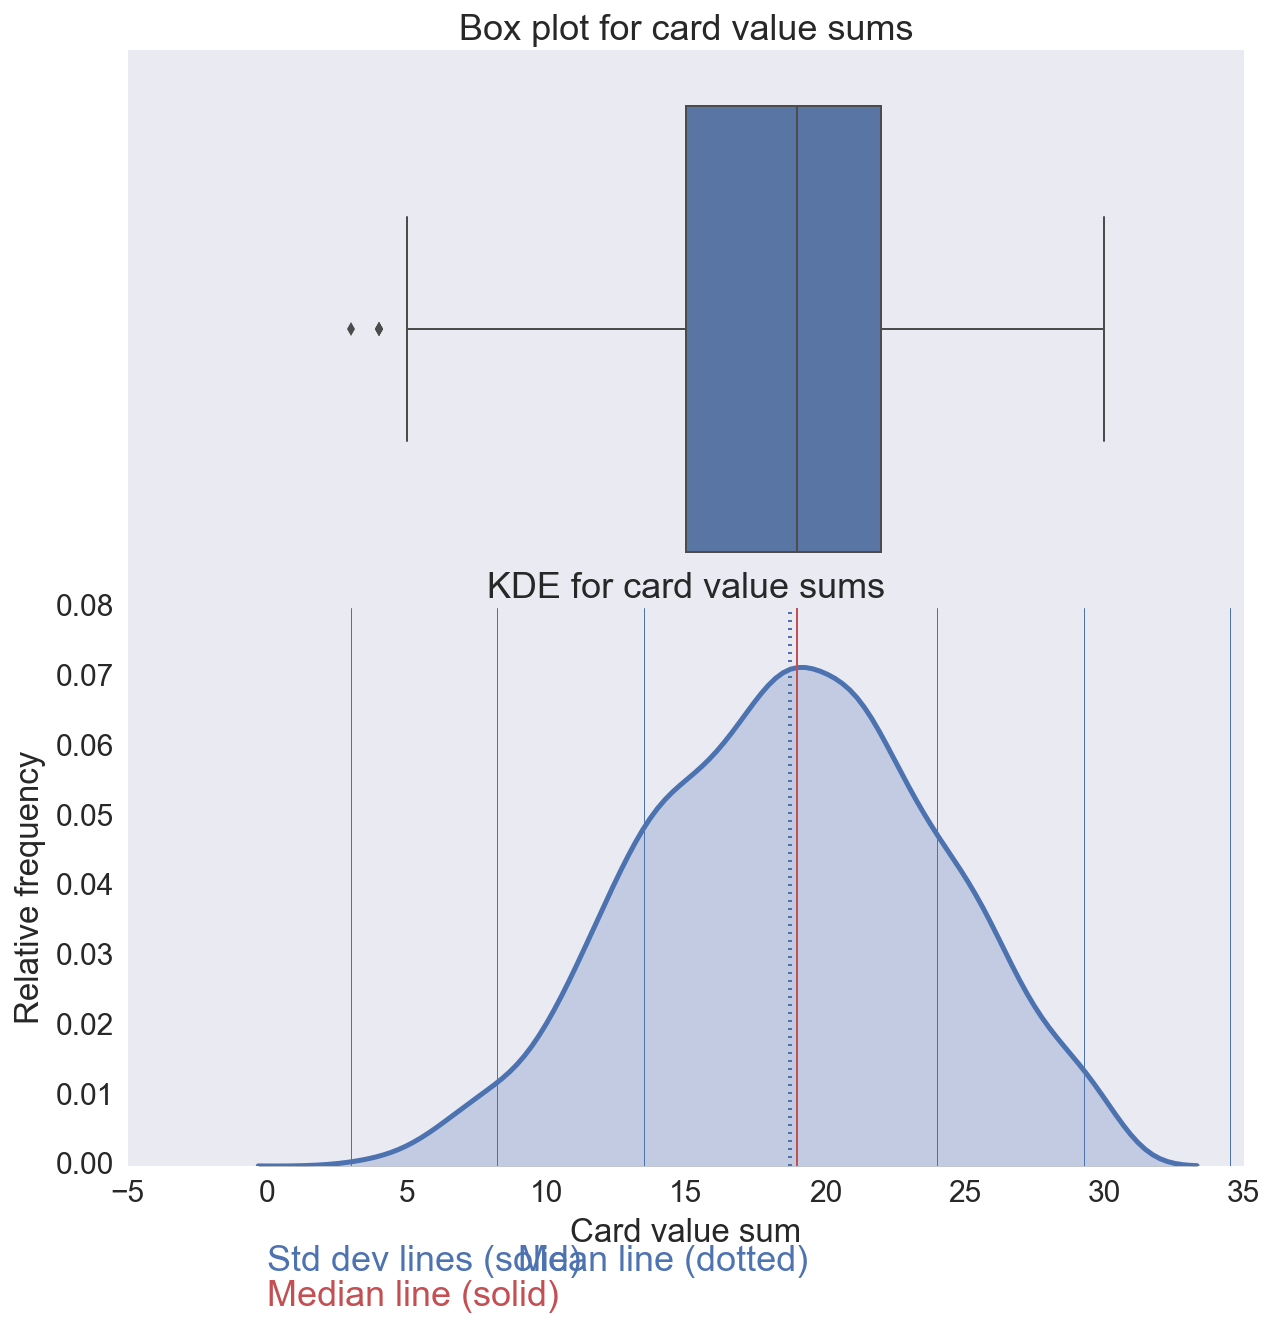

In [34]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
plt.subplots_adjust(hspace=0)

# simple box plot
sns.boxplot(df['sums'], linewidth=1, ax=ax1)
ax1.set_title('Box plot for card value sums')


# KDE plot
sns.kdeplot(df['sums'], shade=True, ax=ax2, legend=False)

# plot vertical lines for mean and standard deviations
for i in range(-3, 4):
    line = plt.axvline(mean + i * stddev, color=c_0, lw=.5)
    if (i == 0):
        plt.setp(line, linestyle='dotted', lw=2)
ax2.text(0,-.015, 'Std dev lines (solid)', color=c_0)
ax2.text(9,-.015, 'Mean line (dotted)', color=c_0)
        
ax2.axvline(median, lw=1, color=c_2)
ax2.text(0,-.02, 'Median line (solid)', color=c_2)

ax2.set_title('KDE for card value sums')
ax2.set_ylabel('Relative frequency')
ax2.set_xlabel('Card value sum')

plt.show()



A visual representation of these statistics can be shown as a box plot and a KDE plot.  Visually we can see that the data is approximately normally distributed about the mean, as well as the quartile ranges.

## 4. Histogram of card value sums
Create a histogram of the sampled card sums you have recorded. Compare its shape to that of the original distribution. How are they different, and can you explain why this is the case?

*Rubric:  A histogram accurately reflecting the sampled data is provided. Discussion of the shape is provided, including a comparison to that of the histogram of the original card values.*

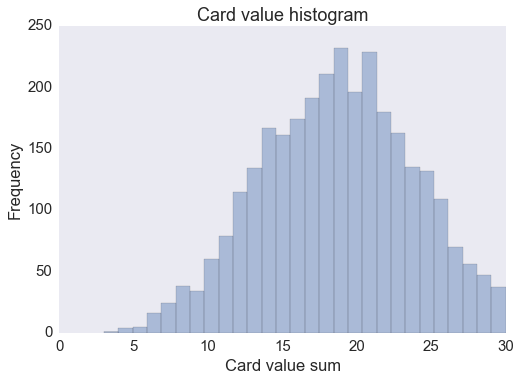

In [25]:
sns.distplot(sums, kde=False)
plt.title("Card value histogram")
plt.xlabel("Card value sum")
plt.ylabel("Frequency")

plt.show()

The relative frequency distribution of individual card values to the frequency distribution of the value of a three card hand are very different features.  

The sampled card sums approximate a normal distribution with a slight negative skew.  This measure is reinforced by comparing the mean to median.  At lower sampling rates, the normal distribution is not as apparent, increasing to larger values more clearly shows the normal distribution.

The relative frequency distribution of cards is a non-normal heavily negatively skewed distribution.  The data in this set is not a sample of a population (or possible outcomes) and is not normally distributed.

## 5. Future predictions and probabilities
Make some estimates about values you will get on future draws. Within what range will you expect approximately 90% of your draw values to fall? What is the approximate probability that you will get a draw value of at least 20? Make sure you justify how you obtained your values.

*Rubric: Estimates are made for the prompted questions that reflect the samples taken and their distribution.*


### 5a. Range for 90% of expected values

z-score at 0.05 = -1.6449


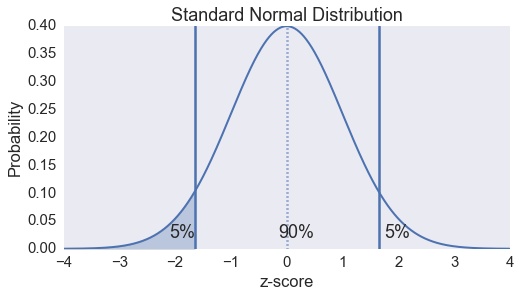

In [26]:


z_score = stats.norm.ppf(.05)
print 'z-score at 0.05 = ' + str(round(z_score, 4))

plt.figure(2, figsize=(8, 4))

x = np.arange(-4, 4, 0.01)
y = normpdf(x, 0, 1)
plt.plot(x, y, lw=2)

# show mean
plt.axvline(x=0, linestyle='dotted', color=c_0)

# show left tail
x_0 = np.arange(-4, z_score, .01)
y_0 = normpdf(x_0, 0, 1)
plt.fill_between(x_0, y_0, alpha=.3)
plt.axvline(x=z_score, color=c_0)

plt.text(-2.1, .02, '5%')
plt.text(-.15, .02, '90%')
plt.text(1.75, .02, '5%')

plt.axvline(x=-z_score, color=c_0)

plt.title('Standard Normal Distribution')
plt.xlabel('z-score')
plt.ylabel('Probability')
plt.show()

Looking at a standard normal distribution, the left tail representing 5% of the area under the curve corresponds to a z-value of $-1.6449$.  The area under the curve above $1.6449$ represents another 5%.  The remaining 90% in the center is represented by the range $0 \pm 1.6449$.

These z-values can be converted to p-values which describe the sample's characteristics.
$$ \bar{x}=18.75 $$
$$ s=5.25 $$
$$ z=\frac{x-\bar{x}}{s} $$

Calculate lower bound:
$$ -1.6449=\frac{x-18.75}{5.25} $$
$$ -1.6449(5.25) = x-18.75 $$
$$ -1.6449(5.25) + 18.75 = x $$
$$ x = 10.11 $$

Calculate upper bound:
$$ -1.6449=\frac{x+18.75}{5.25} $$
$$ -1.6449(5.25) = x+18.75 $$
$$ -1.6449(5.25) - 18.75 = x $$
$$ x = 27.39 $$


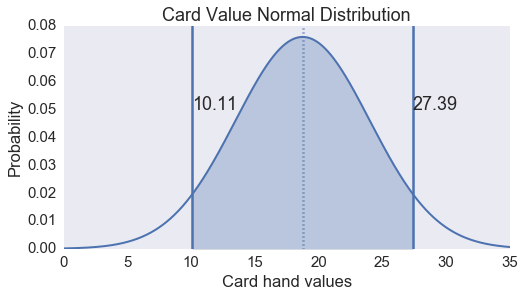

In [27]:
plt.figure(3, figsize=(8, 4))

z_score = stats.norm.ppf(.05)

# plot normal distribution for sample statistics
x = np.arange(0, 35, 0.01)
y = normpdf(x, mean, stddev)
plt.plot(x, y, lw=2)
plt.axvline(x=mean, linestyle='dotted', color=c_0)

# calculate lower and upper bounds
lower = mean + z_score * stddev
upper = mean - z_score * stddev

# shade center portion
x_0 = np.arange(lower, upper, .01)
y_0 = normpdf(x_0, mean, stddev)
plt.fill_between(x_0, y_0, alpha=.3)

# show lower bound
plt.axvline(x=lower, color=c_0)
plt.text(lower, 0.05, str(round(lower,2)))

# show upper bound
plt.axvline(x=upper, color=c_0)
plt.text(upper, 0.05, str(round(upper,2)))

plt.xlabel('Card hand values')
plt.ylabel('Probability')
plt.title('Card Value Normal Distribution')

plt.show()

### 5b. Probability of at least 20

To calculate the probabilty of getting a hand value of at least 20, the area under the normal distrubtion curve must be calculated for values up to 20.  This can be accomplished by calculating the $z$-value, and referncing a $z$-table.

$$ \bar{x}=18.75 $$
$$ s=5.25 $$
$$ z=\frac{x-\bar{x}}{s} $$

$$ z=\frac{20-18.75}{5.25} $$
$$ z=0.24 $$

$$ CDF(0.24) = 0.5948 $$

The result of the cumulative distribution function for $.24$ results in a value of $0.5948$.  

*Note:  There is a slight rounding error on the final CDF value.  AUC reported in the above graph is calculated using unrounded values.  The CDF(0.24) value was looked up from a Z-table.*


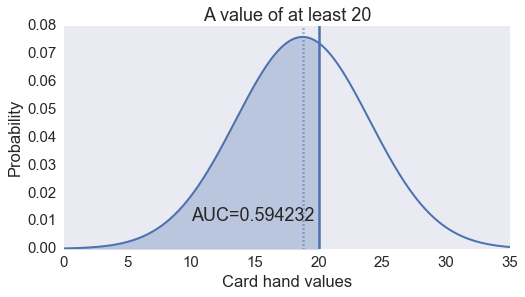

In [28]:
plt.figure(4, figsize=(8, 4))

x = np.arange(0, 35, 0.01)
y = normpdf(x, mean, stddev)
plt.plot(x, y, lw=2)

z_score = stats.norm.cdf(20, mean, stddev)

plt.text(10, .01, 'AUC=%f' % z_score)

x_0 = np.arange(0, 20, .01)
y_0 = normpdf(x_0, mean, stddev)
plt.fill_between(x_0, y_0, alpha=.3)

plt.axvline(x=mean, linestyle='dotted', color=c_0)
plt.axvline(x=20, color=c_0)

# plot titles
plt.title('A value of at least 20')
plt.xlabel('Card hand values')
plt.ylabel('Probability')

plt.show()

The probability of scoring at least 20 is 59.42%.